In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. load and overview data set

In [21]:
dataset = pd.read_csv('../data/raw/bank-additional-full.csv', delimiter=';')

In [22]:
dataset.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
dataset.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

# 2. check balance of Y data

In [25]:
dataset['y'].value_counts()  # Imbalanced DataSet

no     36548
yes     4640
Name: y, dtype: int64

In [26]:
volume = dataset['y'].value_counts(normalize=True)
volume

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [27]:
{0: volume[1], 1: volume[0]}

{0: 0.11265417111780131, 1: 0.8873458288821987}

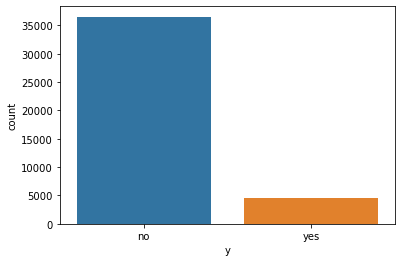

In [28]:
dataset['y'].value_counts()
sns.countplot(x='y', data=dataset)
plt.show()

In [29]:
dataset.shape

(41188, 21)

In [30]:
print(dataset.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


# 2. Distinguish categorical and numerical features
 - there are 20 features, 10 features are numerical and 10 features are categorical

In [31]:
all_features = list(dataset.columns)
all_features.remove('y')  # remove label(y) as feature name

numerical_features = dataset._get_numeric_data().columns.tolist()
categorical_features = list(set(all_features) - set(numerical_features))

In [32]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [33]:
categorical_features

['contact',
 'marital',
 'default',
 'month',
 'housing',
 'loan',
 'day_of_week',
 'education',
 'poutcome',
 'job']

In [34]:
binary_features = ['default', 'housing', 'loan', 'contact']

# 3. Missing data Exploring

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.
- pdays: (numeric; 999 means client was not previously contacted)

In [35]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
for feature in categorical_features:
    dataset[feature].replace('unknown', np.nan, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
dataset.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

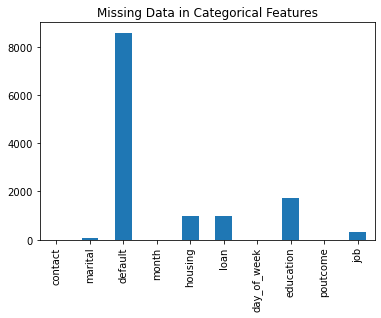

In [38]:
missing_data_sum = dataset[categorical_features].isnull().sum()
missing_data_sum.plot(kind='bar', title='Missing Data in Categorical Features')
plt.show()

# 4. Numerical features distribution

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

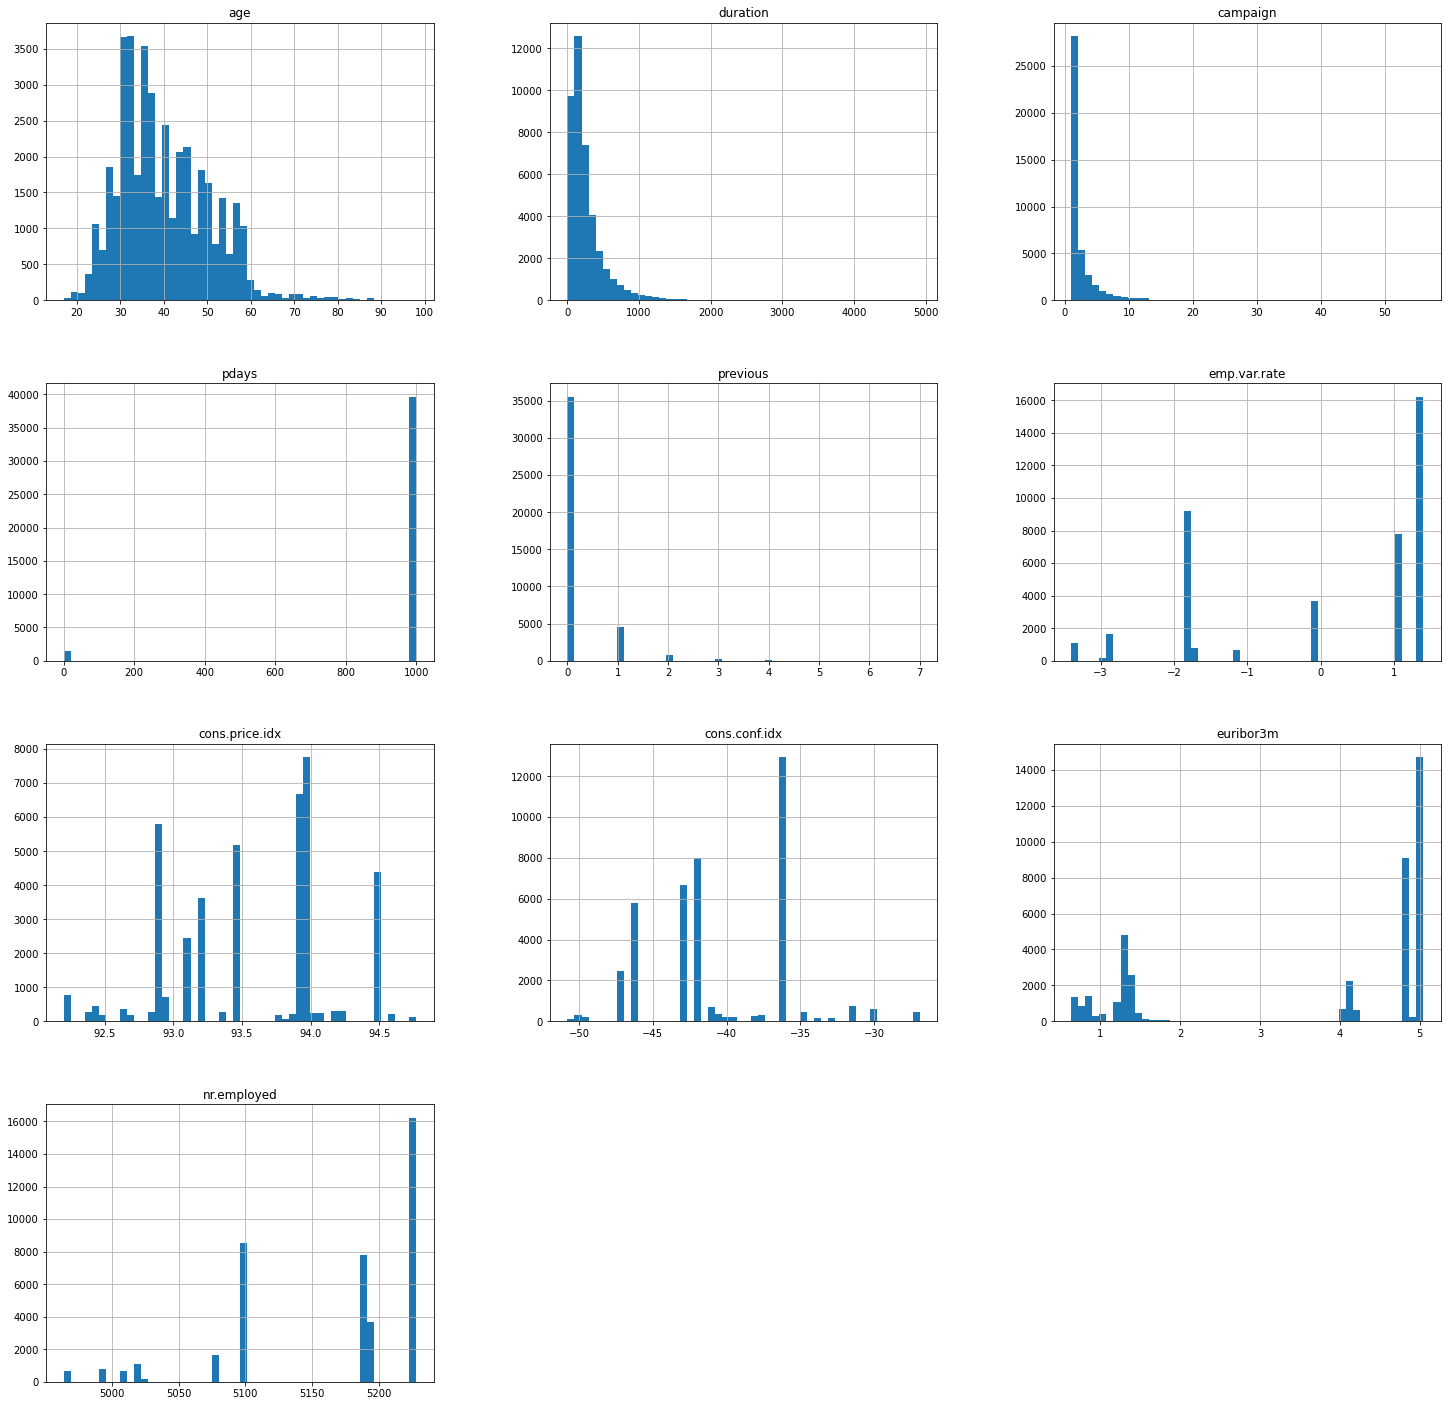

In [39]:
dataset[numerical_features].hist(figsize=(25, 25), bins=50)

# 5. Numerical features relationship

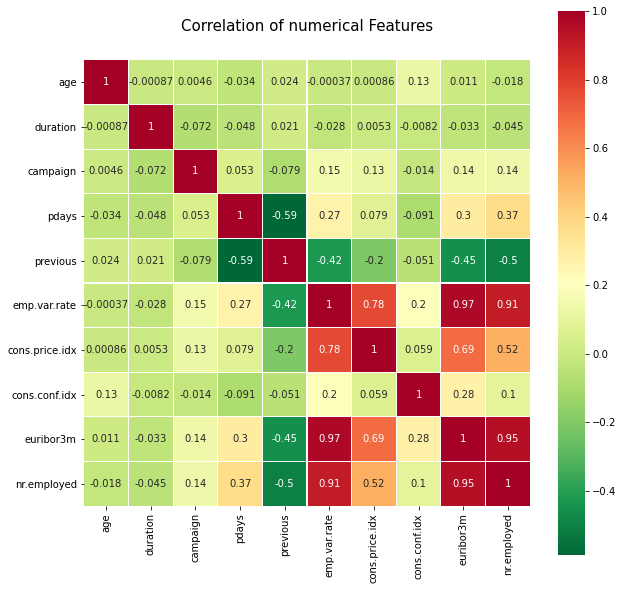

In [40]:
corr = dataset.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdYlGn_r', square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Correlation of numerical Features", y=1.05, size=15)
plt.show()

- emp.var.rate       
- cons.conf.idx         
- nr.employed
- cons.prince.index

these 3 are highly correlated features

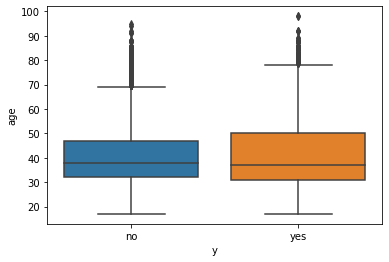

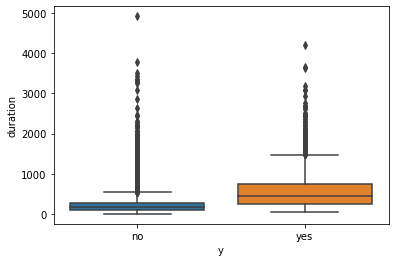

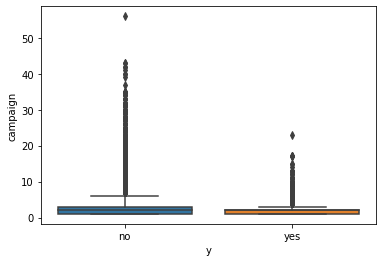

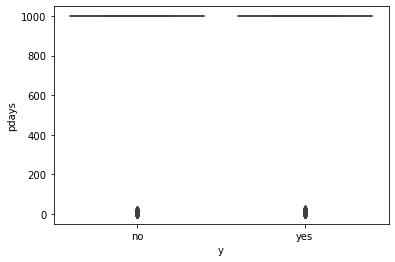

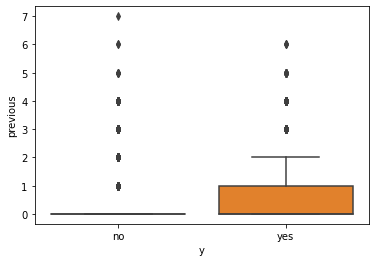

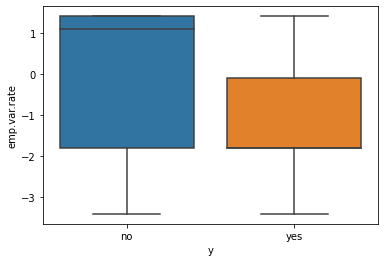

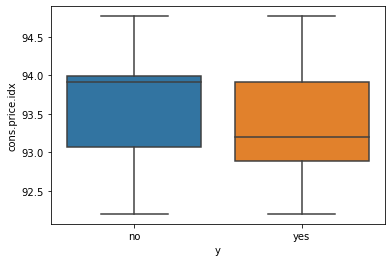

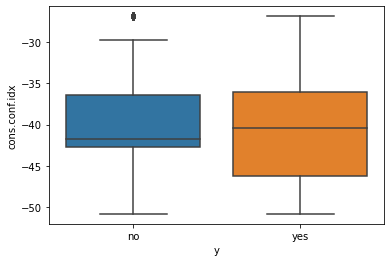

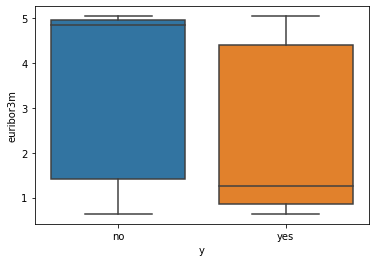

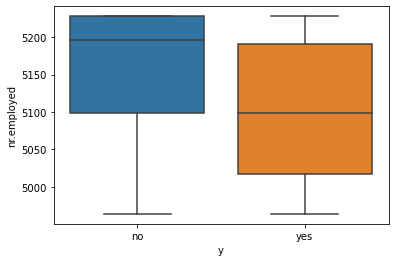

In [41]:
for feature in numerical_features:
    sns.boxplot(x = dataset['y'], y = feature, data = dataset)
    plt.show()

In [42]:
std = dataset['campaign'].std()
mean = dataset['campaign'].mean()

cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
dataset_3std = dataset[(dataset['campaign'] < upper) & (dataset['campaign'] > lower)]
dataset_3std.shape

(40319, 21)

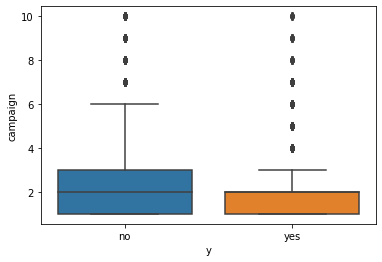

In [43]:
sns.boxplot(x = dataset_3std['y'], y = 'campaign', data = dataset_3std)
plt.show()

In [47]:
df_encoded = pd.get_dummies(dataset)

In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

<AxesSubplot:xlabel='campaign', ylabel='y_yes'>

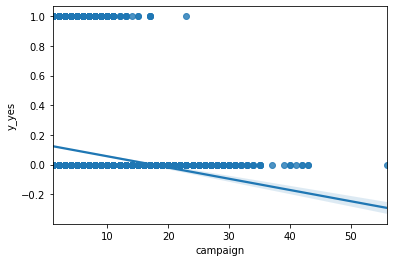

In [54]:
sns.regplot(x="campaign", y="y_yes", data=df_encoded, truncate=True)

Campaign(call) after 20 is times can be invalid